In [6]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

In [7]:
DATADIR = 'images'
CLASS = ['With_Helmet','Without_Helmet']
IMG_SIZE = 50

with_helmet = []
without_helmet = []

# building the training data
def create_training_data(): 
    
    for cl in CLASS:
        path = os.path.join(DATADIR, cl)
        class_num = CLASS.index(cl)
        if class_num == 0:
            for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path, img))
                    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                    with_helmet.append([gray_img, class_num])
                except Exception as e:
                    pass
        if class_num == 1:
            
            for img in os.listdir(path):
                try:
                    
                    img_array = cv2.imread(os.path.join(path, img))
                    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                    without_helmet.append([gray_img, class_num])
                except Exception as e:
                    pass
    random.shuffle(with_helmet)
    random.shuffle(without_helmet)
    training_data = with_helmet[:len(without_helmet)]+without_helmet
    return training_data

training_data = create_training_data()

In [8]:
#shuffle the data
random.shuffle(training_data)
print(len(training_data))

5508


In [9]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [10]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [11]:
# normalizing the data
X = X/255.0


In [12]:
# building the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:], data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X, y, batch_size=32, validation_split=0.2, epochs=15)


Epoch 1/15
138/138 [==============================] - 20s 140ms/step - loss: 0.7670 - accuracy: 0.5507 - val_loss: 0.7947 - val_accuracy: 0.5018
Epoch 2/15
138/138 [==============================] - 17s 121ms/step - loss: 0.5811 - accuracy: 0.6881 - val_loss: 0.9517 - val_accuracy: 0.5445
Epoch 3/15
138/138 [==============================] - 16s 119ms/step - loss: 0.5140 - accuracy: 0.7463 - val_loss: 0.9465 - val_accuracy: 0.5581
Epoch 4/15
138/138 [==============================] - 15s 112ms/step - loss: 0.4544 - accuracy: 0.7929 - val_loss: 1.0157 - val_accuracy: 0.5935
Epoch 5/15
138/138 [==============================] - 16s 113ms/step - loss: 0.3294 - accuracy: 0.8578 - val_loss: 0.9000 - val_accuracy: 0.6561
Epoch 6/15
138/138 [==============================] - 15s 112ms/step - loss: 0.2496 - accuracy: 0.8947 - val_loss: 0.5313 - val_accuracy: 0.7877
Epoch 7/15
138/138 [==============================] - 15s 110ms/step - loss: 0.1595 - accuracy: 0.9419 - val_loss: 0.4546 - val_ac

In [14]:

from tensorflow.keras.models import load_model

model.save('helmet_detect_model.h5')

In [15]:
from tensorflow.keras.preprocessing.image import  load_img
from tensorflow.keras.preprocessing import image 

In [16]:
pic2_array = cv2.imread("images/With_Helmet/BikesHelmets_0_27.jpeg", cv2.IMREAD_GRAYSCALE)
new_array2 = cv2.resize(pic2_array,(IMG_SIZE,IMG_SIZE))

img2_batch = np.expand_dims(new_array2, axis=0)
uimg2 = np.resize(img2_batch,(1,50,50,1))

uimg2 = uimg2/255.0
pred2 = model.predict(uimg2)

pred2

array([[2.130273e-06]], dtype=float32)

In [17]:
pic2_array = cv2.imread("images/Without_Helmet/BikesHelmets_0_4.jpeg", cv2.IMREAD_GRAYSCALE)
new_array2 = cv2.resize(pic2_array,(IMG_SIZE,IMG_SIZE))

img2_batch = np.expand_dims(new_array2, axis=0)
uimg2 = np.resize(img2_batch,(1,50,50,1))

uimg2 = uimg2/255.0
pred2 = model.predict(uimg2)

pred2

array([[0.999407]], dtype=float32)

In [18]:

if pred2>0.5 :
    print("without helmet detected")
    
else:
    
    print("with helmet detected")

without helmet detected


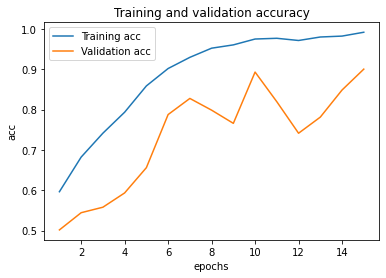

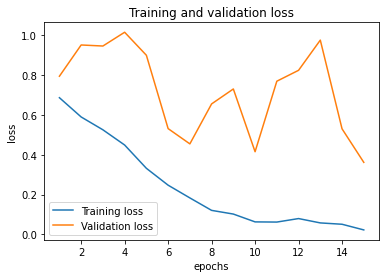

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()